In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid') # used so that all plots or graphs generated have smilar kind of style and uniformity

In [57]:
!git clone https://github.com/HarshvardhanSingh-13/Datasets

# we can also upload the dataset but its like everytime we come back to
# the code we need to upload that again so a better way of doing this is
#cloning the datasets so that remains in this.


fatal: destination path 'Datasets' already exists and is not an empty directory.


In [58]:
df=pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')

In [59]:
df.head()
#gives rows from top ;
#we can also specify the no. of rows we want from the top in the brackets

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.tail()
#gives rows from bottom ;
#we can also specify the no. of rows we want from the bottom in the brackets

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [61]:
df.shape

(891, 12)

In [62]:
df.info()

#The dataset contains 891 entries (passengers) and 12 columns.
#Missing Values Identified:`Age`, `Cabin`, and `Embarked` have missing values.
#`Cabin` is missing a significant amount of data (~77%), which will require special attention.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.describe()


#Survived: About 38.4% of passengers in this dataset survived.
#Age: The age ranges from ~5 months to 80 years, with an average age of about 30.
#Fare: The fare is highly skewed, with a mean of $32 but a median of only $14.45.
# The maximum fare is over $512, indicating the presence of extreme outliers.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 3: Data Cleaning

Before analysis, we must handle the missing values we identified.

#### **Theoretical Concept: Missing Value Imputation**

Imputation is the process of replacing missing data with substituted values. The strategy depends on the data type and its distribution:
- **Numerical Data:** For skewed distributions (like `Age` and `Fare`), using the **median** is more robust than the mean because it is not affected by outliers.
- **Categorical Data:** A common strategy is to fill with the **mode** (the most frequent value).
- **High Cardinality/Too Many Missing Values:** For columns like `Cabin`, where most data is missing, imputing might not be effective. We could either drop the column or engineer a new feature from it (e.g., `Has_Cabin`).

In [64]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [65]:
med=df['Age'].median()
#finding median because in age column we are going to fill the null values with
#median

In [66]:
df['Age']=df['Age'].fillna(med)
#we are not filling it with zero because if we take the mean later it will move
#more towards zero then
#if we don't do df['Age']= then the changes won't be made to the dataframe

In [67]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [68]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [69]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
df['Cabin'].notna().value_counts()

,count
Cabin,
False,687
True,204


In [71]:
df['Has_Cabin']=df['Cabin'].notna().astype(int)
#converting to integer as machine understands integer better
#a new column has been created with name has_cabin and this is called
#feature engineering where we have created a new feature as we dont care wbout the cabin number
# its just for us to know if the passenger has cabin or not so it will decide class-1,2,3

In [72]:
df.drop('Cabin',axis=1,inplace=True)
#now we dont require cabin so we drop this
#axis=1 means we are dropping the entire column
#axis=0 means the entire row

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [74]:
df.isnull().sum()

#this shows that our data is clean for the first stage

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Step 4: Univariate Analysis

We analyze each variable individually to understand its distribution.

#### **Theoretical Concept: Univariate Analysis**

This is the simplest form of data analysis, where the data being analyzed contains only one variable. The main purpose is to describe the data and find patterns within it.
- **For Categorical Variables:** We use frequency tables, bar charts (`countplot`), or pie charts to see the count or proportion of each category.
- **For Numerical Variables:** We use histograms (`histplot`) or kernel density plots (`kdeplot`) to understand the distribution, and box plots (`boxplot`) to identify the central tendency, spread, and outliers.

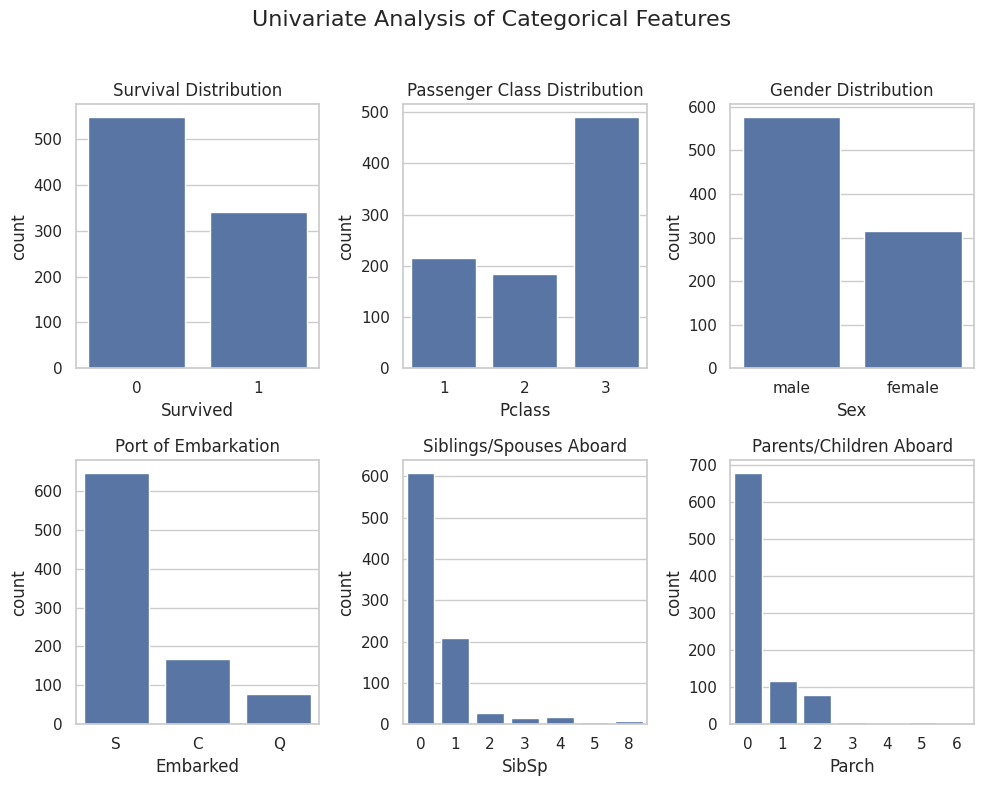

In [75]:
# Set up the figure for plotting
#2-- number of rows,3-- no of columns---figsize--dimension of the plot
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])  #[left edge of fig, bottom, right, top]
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.

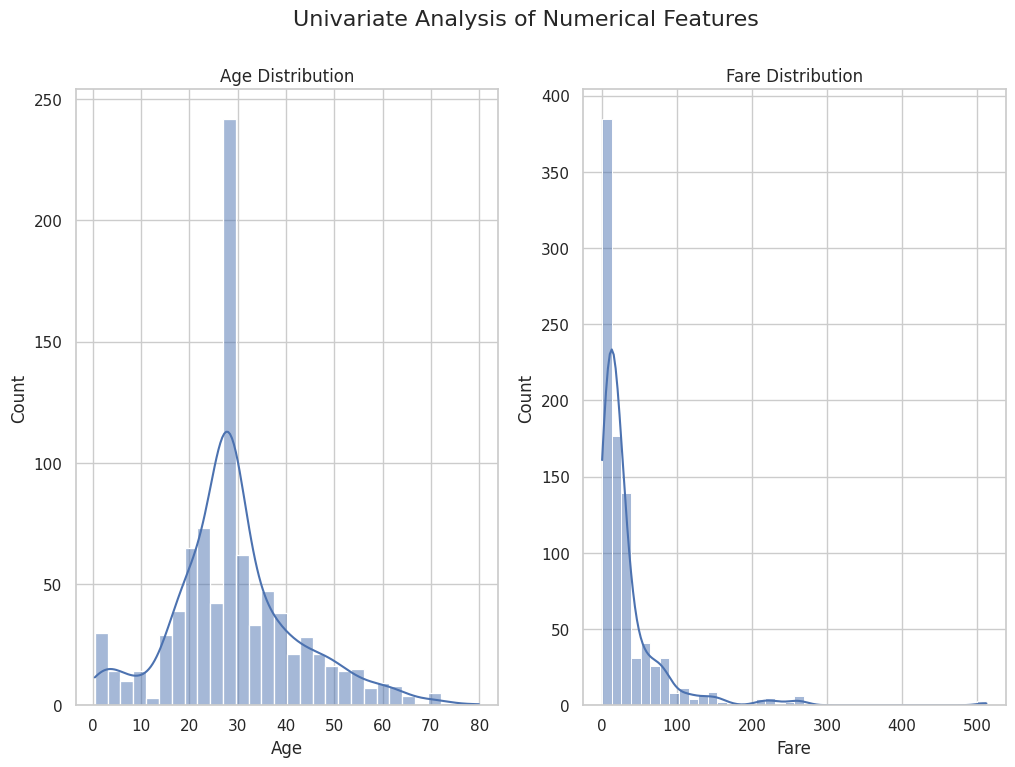

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

#KDE is a smooth curve that shows how data is distributed, instead of using bars like a histogram.

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

Right-skewed: if the mean is higher than the median, and left-skewed if the mean is below the median.

In a right skewed histogram, the tail extends towards the higher values, indicating a skewness towards the right side.

In contrast, a left skewed histogram has a tail that extends towards the lower values, skewing towards the left side.

### Step 5: Bivariate Analysis

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates to our target variable, `Survived`.

#### **Theoretical Concept: Bivariate Analysis**
This type of analysis involves two different variables, and its main purpose is to find relationships between them.
- **Categorical vs. Numerical:** To compare a numerical variable across different categories, we often use bar plots (`barplot`) that show the mean (or another estimator) of the numerical variable for each category. We can also use box plots or violin plots.
- **Categorical vs. Categorical:** We can use stacked bar charts or contingency tables (crosstabs).
- **Numerical vs. Numerical:** A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship.

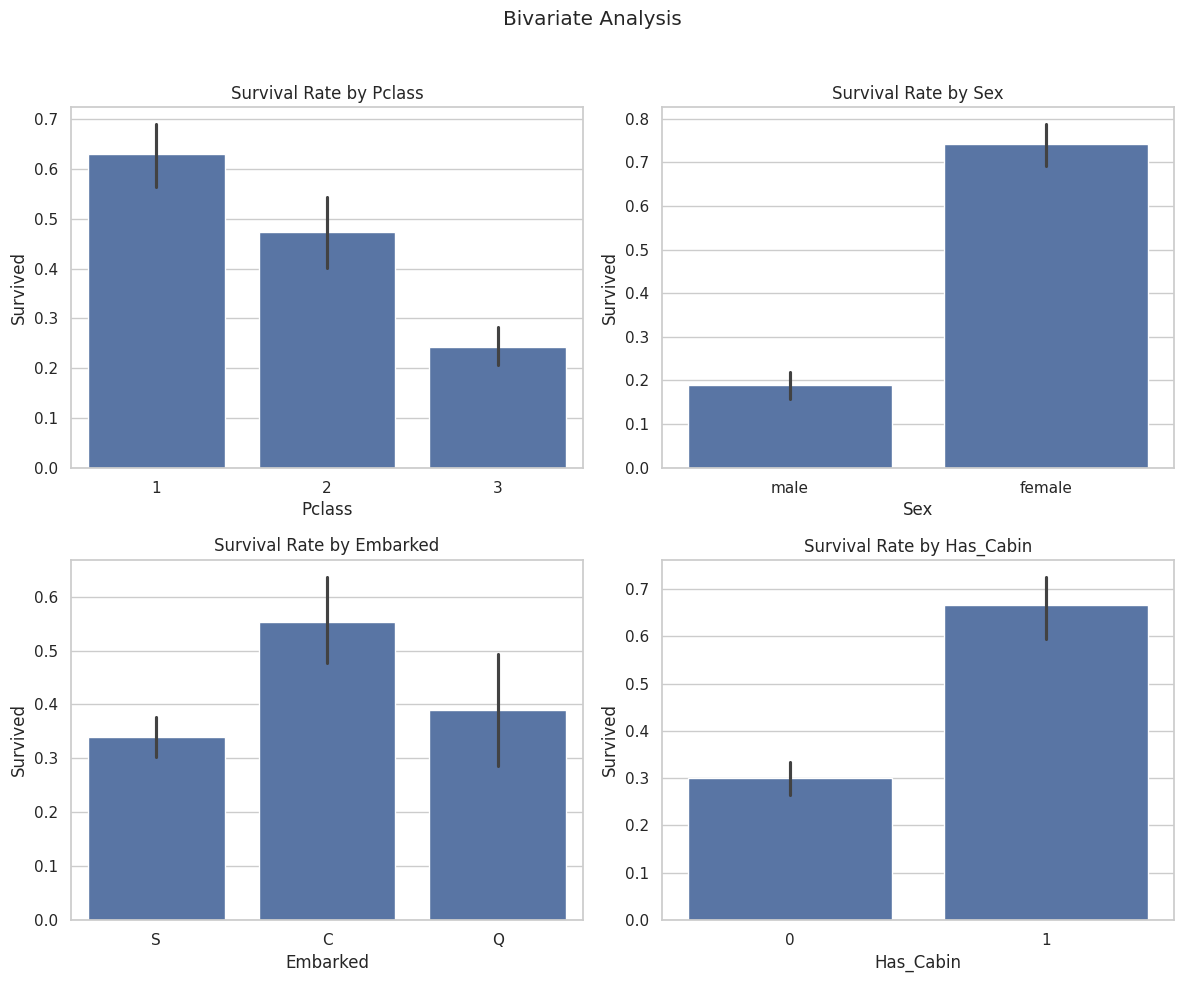

In [77]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Bivariate Analysis')

sns.barplot(ax=axes[0,0],x='Pclass',y='Survived',data=df).set_title('Survival Rate by Pclass')

sns.barplot(ax=axes[0,1],x='Sex',y='Survived',data=df).set_title('Survival Rate by Sex')

sns.barplot(ax=axes[1,0],x='Embarked',y='Survived',data=df).set_title('Survival Rate by Embarked')

sns.barplot(ax=axes[1,1],x='Has_Cabin',y='Survived',data=df).set_title('Survival Rate by Has_Cabin')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

Those black lines are called confidence intervals.

In a bar plot that shows the mean (like the survival rate here, which is the mean of the 0s and 1s in the 'Survived' column), the confidence interval represents the range within which the true mean is likely to fall. A shorter line indicates less uncertainty about the mean, while a longer line indicates more uncertainty.

Seaborn automatically calculates and displays these 95% confidence intervals when you use barplot.

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

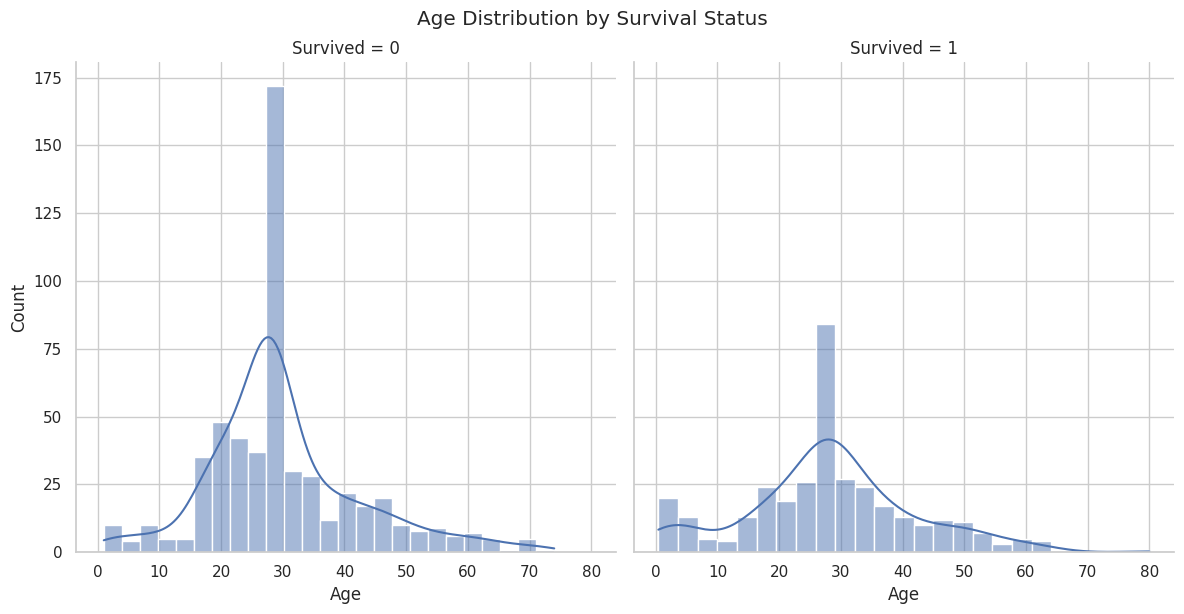

In [78]:
# Age vs. Survival
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)  # bins--Divides the Age range into 25 equal-width intervals
plt.suptitle('Age Distribution by Survival Status', y=1.02) #y=1.02 Moves the title slightly upward
plt.show()

**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

#### Deeper Dive: Outlier Analysis for 'Fare'

Quartile1----25% of data----lower quartile
Quartile2----50% of data
Quartile3----75% of data----upper quartile
Quartile4----100% of data

IQR---Interquartile Range----Q3-Q1--region where max amt of data is present

Range is from a min to max so formula to calculate the min and max value is like this:

min= Q1-1.5(IQR)

max=Q3+1.5(IQR)

Anything that goes below and above this min and max value is an outlier for us


The `.describe()` function and histogram showed that `Fare` has extreme outliers. Let's visualize this clearly with a box plot.

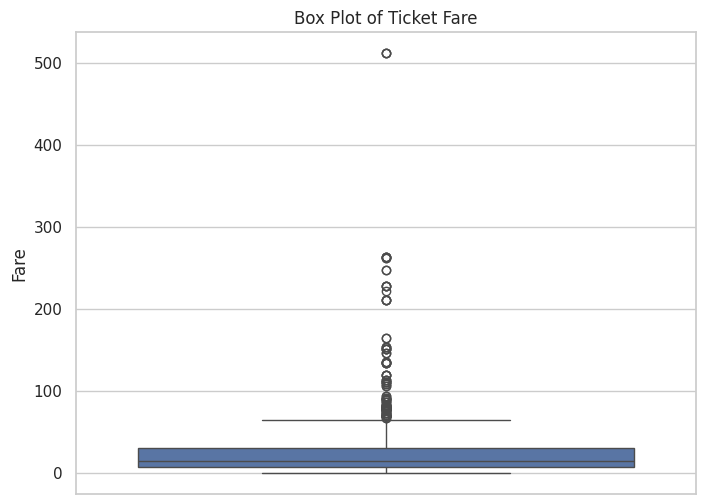

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Fare', data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

### Step 6: Feature Engineering
Now, we'll create new features from the existing ones to potentially uncover deeper insights and provide more useful information for a machine learning model.
#### **Theoretical Concept: Feature Engineering**
Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. A good feature should be relevant to the problem and easy for a model to understand.

**Common Techniques:**
1.  **Combining Features:** Creating a new feature by combining others (e.g., `SibSp` + `Parch` = `FamilySize`).
2.  **Extracting from Text:** Pulling out specific information from a text feature (e.g., extracting titles from the `Name` column).
3.  **Binning:** Converting a continuous numerical feature into a categorical one (e.g., binning `Age` into groups like 'Child', 'Adult', 'Senior').

In [80]:
# 1. Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the person themselves

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [82]:
# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

#there are two functions---loc, iloc
#iloc works on indexes and loc works on names

#so the code line says that-- wherevever my familysize is 1,,, isalone should be equal to 1

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


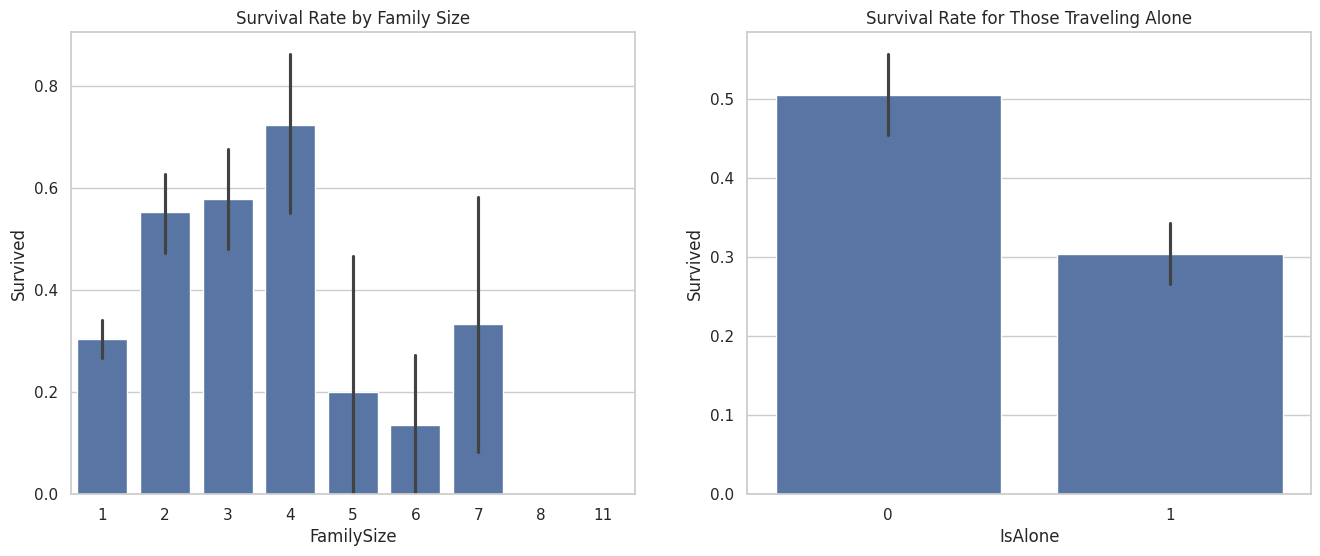

In [84]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [85]:
# 3. Extract 'Title' from the 'Name' column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
df['Title'].value_counts()

Extracted Titles:


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


* Matches a space.
* Titles in the names are usually preceded by a space.
([A-Za-z]+): This is the capturing group.
* [A-Za-z]+: Matches one or more uppercase or lowercase letters. This captures the title itself (like Mr, Mrs, Miss, etc.).
* \.: Matches a literal dot (.) which usually follows the title.

In [86]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


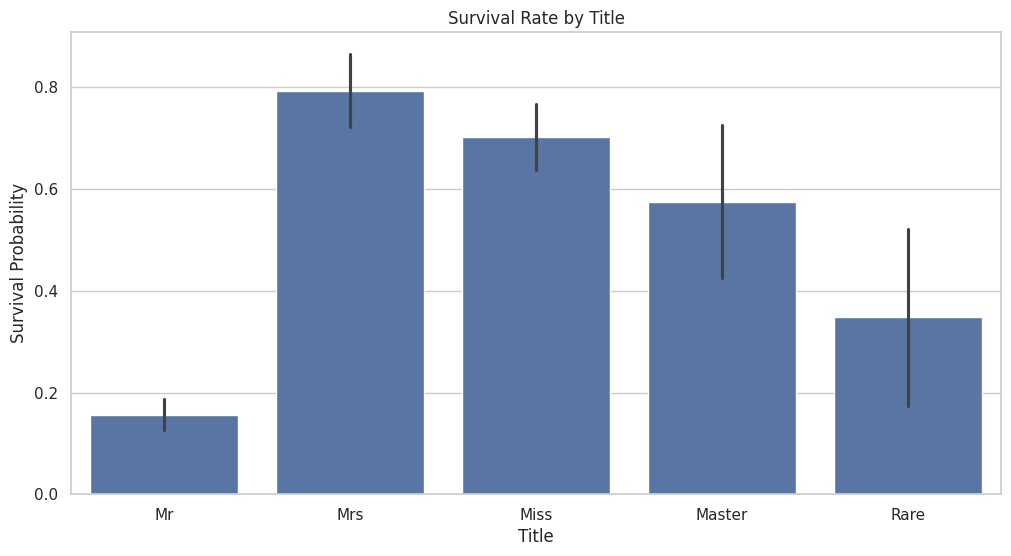

In [87]:
# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

### Step 7: Multivariate Analysis

Now we explore interactions between multiple variables simultaneously, including our new engineered features.

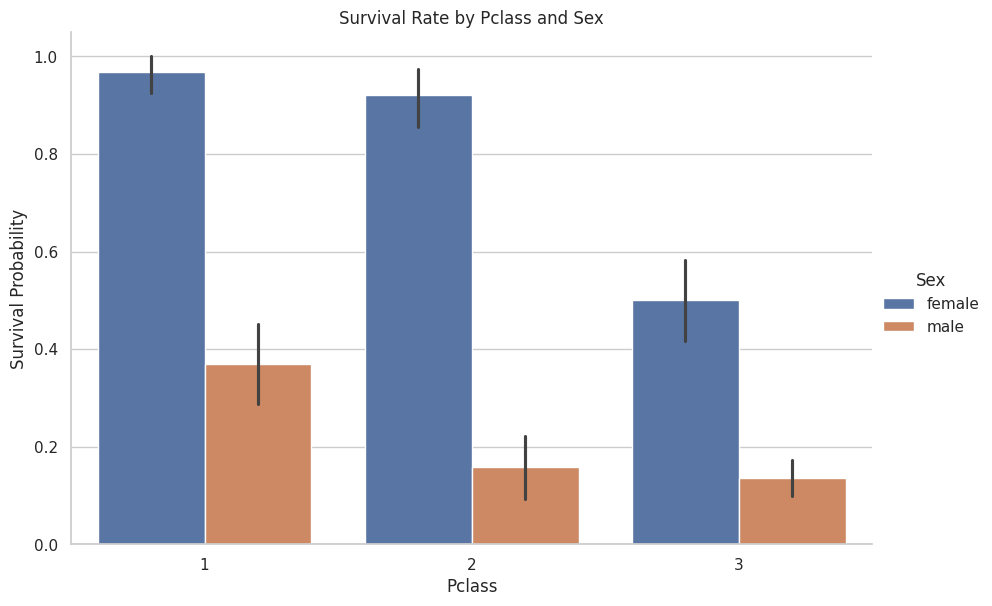

In [88]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

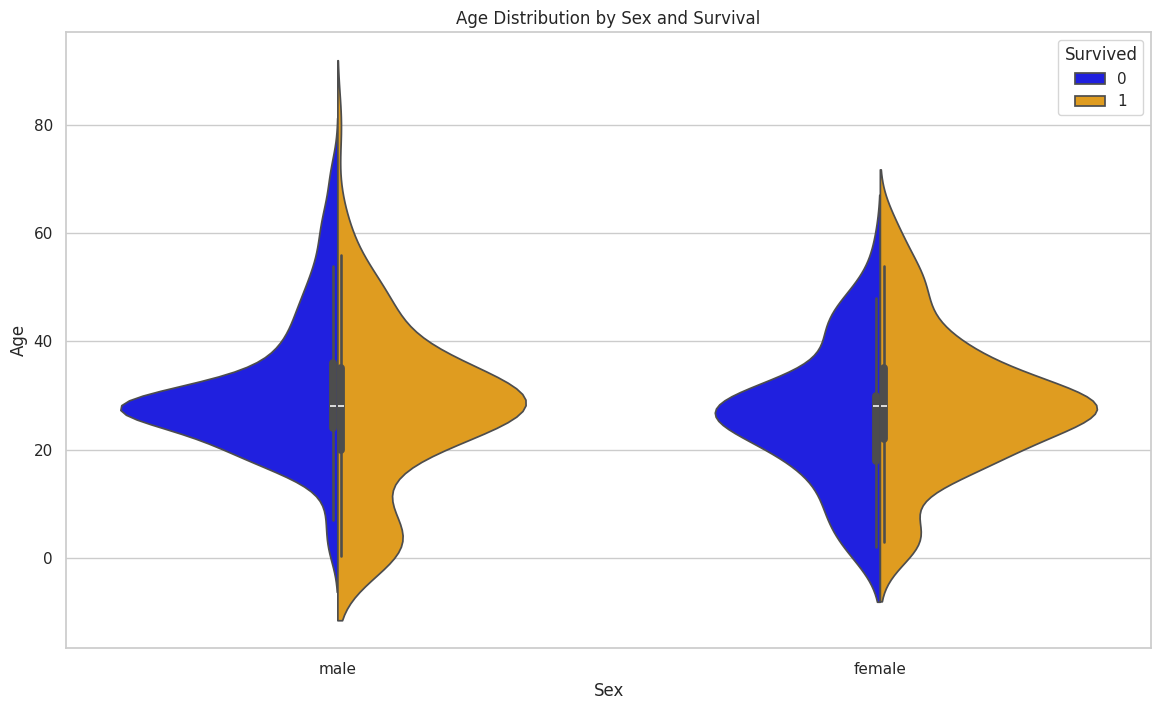

In [89]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

### Step 8: Correlation Analysis

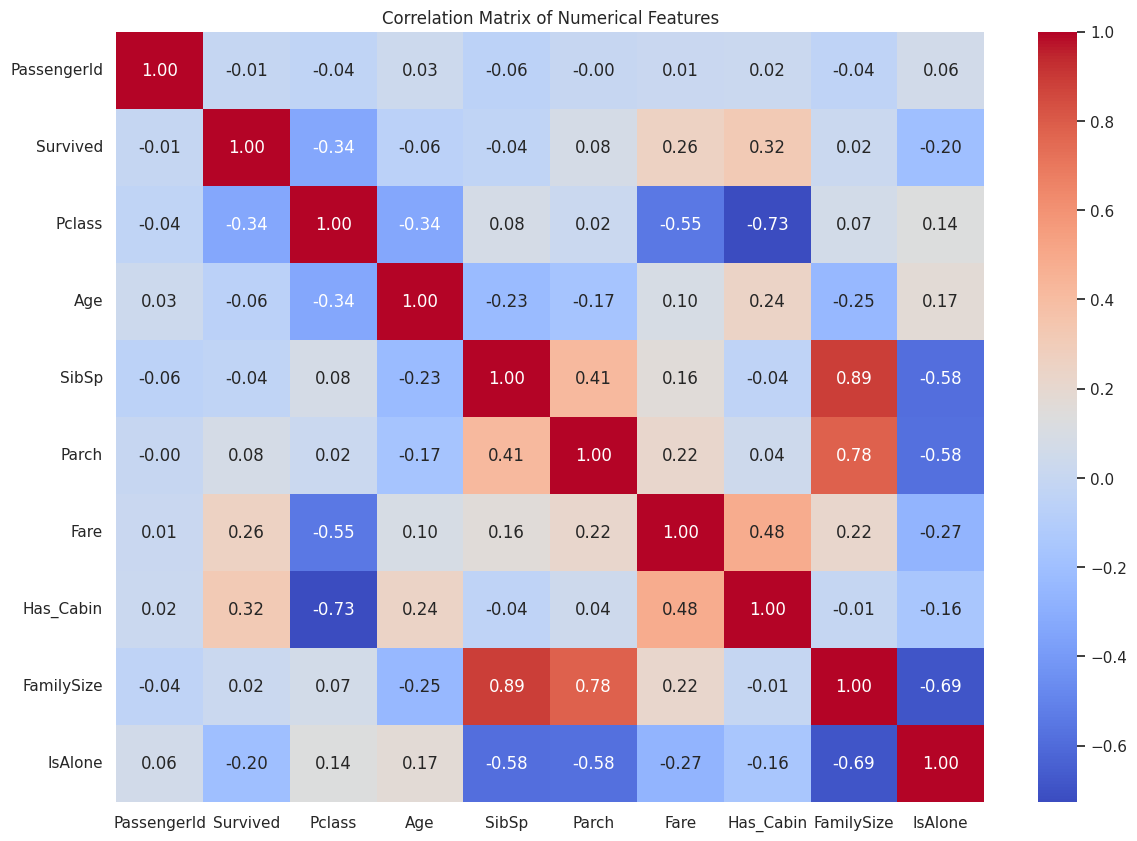

In [90]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

In [91]:
!pip install ydata-profiling -q

In [92]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [93]:
profile.to_file("Titanic Dataset Y-Profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]